In [77]:
import Bio.PDB
import numpy
import pandas as pd

In [78]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return numpy.sqrt(numpy.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

In [79]:
pdb_code = "6TKO"
pdb_filename = "/home/kestr/AT1/pdb/raw/arr/6TKO.pdb" #not the full cage!
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

/home/kestr/AT1/.venv/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom N defined twice in residue <Residue ALA het=  resseq=42 icode= > at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/kestr/AT1/.venv/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CA defined twice in residue <Residue ALA het=  resseq=42 icode= > at line 5.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/kestr/AT1/.venv/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom C defined twice in residue <Residue ALA het=  resseq=42 icode= > at line 7.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/kestr/AT1/.venv/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:416: PDBConstruc

In [81]:
dist_matrix = calc_dist_matrix(model["A"], model["B"])
contact_map = dist_matrix < 3.5

/tmp/ipykernel_1051835/4068902818.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)


In [82]:
numpy.min(dist_matrix)

4.736725807189941

In [83]:
numpy.max(dist_matrix)

97.40099334716797

In [84]:
dist_matrix

array([[82.44895935, 78.72801208, 75.81819153, ..., 87.47000885,
        87.84035492, 90.97045135],
       [79.67661285, 75.93989563, 73.11560059, ..., 84.71698761,
        85.10134125, 88.22047424],
       [77.29177094, 73.57513428, 70.80002594, ..., 81.8309021 ,
        82.33016205, 85.50922394],
       ...,
       [48.13683319, 44.34331512, 41.90350723, ..., 54.8880043 ,
        54.80960846, 57.57693481],
       [50.3735733 , 46.56998444, 43.97858429, ..., 57.68493271,
        57.46595001, 60.17192841],
       [48.38386536, 44.57713699, 42.03510284, ..., 56.58938599,
        56.15240097, 58.69045258]])

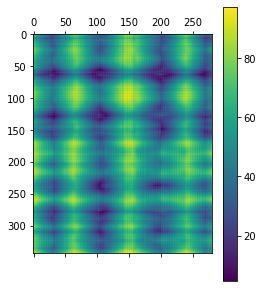

In [85]:
import pylab
pylab.matshow(numpy.transpose(dist_matrix))
pylab.colorbar()
pylab.show()

In [86]:
dm=pd.DataFrame(dist_matrix)

In [87]:
dm

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
0,82.448959,78.728012,75.818192,72.174713,70.129539,66.367470,64.476494,61.056080,58.223316,58.992893,...,79.333008,77.882011,77.778595,79.400024,82.773819,83.442841,83.898849,87.470009,87.840355,90.970451
1,79.676613,75.939896,73.115601,69.444199,67.442406,63.672699,61.825191,58.476929,55.556602,56.425041,...,76.874962,75.297073,75.156448,76.694809,80.092445,80.795464,81.149834,84.716988,85.101341,88.220474
2,77.291771,73.575134,70.800026,67.092018,65.239052,61.454910,59.779408,56.499508,53.629593,54.719612,...,73.592354,72.015839,71.970581,73.570900,77.015190,77.825768,78.228539,81.830902,82.330162,85.509224
3,75.283333,71.538544,68.851791,65.138039,63.250950,59.475861,57.753262,54.539551,51.527458,52.608528,...,72.635933,70.888176,70.723358,72.163185,75.600822,76.380745,76.611923,80.179222,80.617867,83.737137
4,73.067780,69.316971,66.530182,62.858406,60.835648,57.069866,55.208809,51.901539,48.918144,49.831619,...,71.358597,69.643982,69.327110,70.706604,74.062347,74.677025,74.901115,78.428764,78.729134,81.794113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.617874,42.836464,40.056240,36.457932,34.225727,30.502106,28.509016,25.322805,22.186628,23.384720,...,51.039921,48.880920,47.522236,48.047085,50.959290,50.890507,50.567467,53.803196,53.542969,56.287449
276,45.015129,41.213337,38.662006,35.044670,32.905190,29.227856,27.335182,24.446224,21.080090,22.495419,...,50.334953,47.946091,46.504814,46.819435,49.736885,49.716721,49.155991,52.346333,52.088406,54.774319
277,48.136833,44.343315,41.903507,38.239357,36.265190,32.585224,30.858873,28.069958,24.715590,26.233923,...,52.058998,49.640793,48.423103,48.871540,51.935074,52.138756,51.620708,54.888004,54.809608,57.576935
278,50.373573,46.569984,43.978584,40.384415,38.157379,34.487003,32.445286,29.420269,26.042582,27.091839,...,54.985046,52.681931,51.410927,51.881390,54.873486,54.932297,54.457363,57.684933,57.465950,60.171928


In [88]:
df = dm.reset_index()
out = pd.melt(df,
            id_vars='index',
            value_vars=list(df.columns[1:]), # list of days of the week
            var_name='Column',
            value_name='Sum of Value')

In [89]:
out

,index,Column,Sum of Value
0,0,0,82.448959
1,1,0,79.676613
2,2,0,77.291771
3,3,0,75.283333
4,4,0,73.067780
...,...,...,...
96315,275,343,56.287449
96316,276,343,54.774319
96317,277,343,57.576935
96318,278,343,60.171928


In [90]:
from biopandas.pdb import PandasPdb

In [91]:
ppdb=PandasPdb().read_pdb('/home/kestr/AT1/pdb/raw/arr/6TKO.pdb')

In [92]:
atoms = ppdb.df['ATOM']

In [93]:
atoms

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,ALA,,A,42,,...,131.298,179.054,118.078,1.0,1.33,,A,N,NaN,1
1,ATOM,2,,N,,ALA,,A,42,,...,131.298,179.054,118.078,1.0,118.81,,A,N,NaN,2
2,ATOM,3,,CA,,ALA,,A,42,,...,131.027,177.626,118.189,1.0,1.33,,A,C,NaN,3
3,ATOM,4,,CA,,ALA,,A,42,,...,131.027,177.626,118.189,1.0,118.81,,A,C,NaN,4
4,ATOM,5,,C,,ALA,,A,42,,...,130.332,177.312,119.509,1.0,118.81,,A,C,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,ATOM,6956,,N,,GLU,,B,359,,...,99.026,94.958,131.461,1.0,60.11,,B,N,NaN,6957
6956,ATOM,6957,,CA,,GLU,,B,359,,...,98.168,93.804,131.219,1.0,60.11,,B,C,NaN,6958
6957,ATOM,6958,,C,,GLU,,B,359,,...,96.797,94.246,130.720,1.0,60.11,,B,C,NaN,6959
6958,ATOM,6959,,O,,GLU,,B,359,,...,96.685,94.915,129.693,1.0,60.11,,B,O,NaN,6960


In [96]:
Rs=atoms[atoms['chain_id']=='A'].groupby(by = 'residue_number').first().reset_index()[['residue_number','residue_name','b_factor']]

In [97]:
Rs

,residue_number,residue_name,b_factor
0,42,ALA,1.33
1,43,GLY,1.34
2,44,CYS,128.12
3,45,SER,1.36
4,46,LEU,1.37
...,...,...,...
275,354,LYS,8.55
276,355,ARG,8.56
277,356,LEU,8.57
278,357,LEU,8.58


In [98]:
As=atoms[atoms['chain_id']=='B'].groupby(by = 'residue_number').first().reset_index()[['residue_number','residue_name','b_factor']]

In [99]:
As.add_suffix("_a")

,residue_number_a,residue_name_a,b_factor_a
0,6,THR,55.51
1,7,ARG,52.77
2,8,VAL,50.18
3,9,PHE,46.09
4,10,LYS,50.58
...,...,...,...
339,355,LYS,47.05
340,356,PRO,46.61
341,357,LYS,54.68
342,358,GLU,61.45


In [103]:
outf = out[out['Sum of Value']<6]

In [104]:
outf

,index,Column,Sum of Value
16064,104,57,5.705220
18184,264,64,5.680252
18187,267,64,5.965660
18409,209,65,5.943053
18412,212,65,5.759072
18413,213,65,5.849819
18689,209,66,5.128192
18969,209,67,5.591208
35953,113,128,5.984097
36432,32,130,5.286324


In [105]:
outf.merge(Rs.add_suffix("_r").reset_index(),on='index').merge(As.reset_index().add_suffix("_a"),left_on='Column',right_on='index_a')

,index,Column,Sum of Value,residue_number_r,residue_name_r,b_factor_r,index_a,residue_number_a,residue_name_a,b_factor_a
0,104,57,5.705220,146,PRO,34.50,57,63,TYR,71.21
1,264,64,5.680252,343,TYR,7.53,64,70,VAL,97.02
2,267,64,5.965660,346,SER,8.47,64,70,VAL,97.02
3,209,65,5.943053,288,ALA,6.33,65,71,LEU,95.33
4,212,65,5.759072,291,THR,6.36,65,71,LEU,95.33
5,213,65,5.849819,292,LEU,6.37,65,71,LEU,95.33
6,209,66,5.128192,288,ALA,6.33,66,72,GLY,94.85
7,209,67,5.591208,288,ALA,6.33,67,73,LEU,90.31
8,113,128,5.984097,155,ARG,4.39,128,134,GLU,83.24
9,32,130,5.286324,74,THR,2.37,130,136,THR,89.11
